In [ ]:
import pandas as pd
import numpy as np
trips = pd.read_csv("psrc_trips.csv")
cluster = pd.read_csv("spectral_clustering_result.csv")

<ipython-input-1-8187e958b784>:3: DtypeWarning: Columns (5,8,25,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,52,68,69,73,75,76,79,86,87,88,89,90,91,92,93,94,95,96,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,130,131,132,133,134,135,136,137,138,139,140,142,154) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv("psrc_trips.csv")


In [ ]:
cluster['o_tract10'] = cluster['Census Tract']
cluster['d_tract10'] = cluster['Census Tract']
trips['weight'] = np.sum(trips[['trip_adult_weight_2021', 'trip_respondent_weight_2021',
       'trip_weight_2017', 'trip_weight_2019', 'trip_weight_2017_2019',
       'trip_adult_weight_2017_2019']].fillna(0).values,axis=1)

data_o = trips.merge(cluster, on='o_tract10').fillna(0)
data_o = data_o.groupby(["Cluster","main_mode"])['weight'].sum().reset_index().pivot(index="Cluster",columns="main_mode",values="weight").reset_index().fillna(0)
values = (data_o[[0]] / (len(data_o.columns) - 2)).values + data_o[["Bike","HOV","Other","SOV","Transit","Walk"]].values
data_o = pd.DataFrame(values, columns = ["Bike","HOV","Other","SOV","Transit","Walk"])

data_d = trips.merge(cluster, on='o_tract10').fillna(0)
data_d = data_d.groupby(["Cluster","main_mode"])['weight'].sum().reset_index().pivot(index="Cluster",columns="main_mode",values="weight").reset_index().fillna(0)
values = (data_d[[0]] / (len(data_d.columns) - 2)).values + data_d[["Bike","HOV","Other","SOV","Transit","Walk"]].values
data_d = pd.DataFrame(values, columns = ["Bike","HOV","Other","SOV","Transit","Walk"])

In [ ]:
data_o.to_csv("data_o.csv")
data_d.to_csv("data_d.csv")

In [ ]:
import pandas as pd
import numpy as np
first_phase = pd.read_csv("first_phase.csv",index_col=0)
trips = pd.read_csv("psrc_trips.csv")

<ipython-input-9-2f64bb782645>:4: DtypeWarning: Columns (5,8,25,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,52,68,69,73,75,76,79,86,87,88,89,90,91,92,93,94,95,96,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,130,131,132,133,134,135,136,137,138,139,140,142,154) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv("psrc_trips.csv")


In [ ]:
first_phase = pd.read_csv("first_phase.csv",index_col=0)
trips = pd.read_csv("psrc_trips.csv")
trips['weight'] = np.sum(trips[['trip_adult_weight_2021', 'trip_respondent_weight_2021',
       'trip_weight_2017', 'trip_weight_2019', 'trip_weight_2017_2019',
       'trip_adult_weight_2017_2019']].fillna(0).values,axis=1)
trips['Census Tract'] = trips['o_tract10']
trips_use = trips[trips["Census Tract"].astype(str).str.startswith("53033")]
trips_use = trips_use[['person_dim_id','trip_id','weight',"main_mode",'Census Tract']]
cluster = pd.read_csv("spectral_clustering_result.csv",index_col=0)
data = trips_use.merge(cluster, on="Census Tract")
data = data.merge(first_phase, on="person_dim_id", how="left")
construction = pd.read_csv("construction.csv", index_col=0)
data["TRACT"] = data["Census Tract"].astype(int)
data = data.merge(construction, on="TRACT", how="left")
data["TRACT"] = data["TRACT"].astype(str).str[-5:]
data["TRACT"] = data["TRACT"].astype(float).values/100
gtfs = pd.read_csv("gtfs.csv",index_col=0)
street = pd.read_csv("street.csv",index_col=0)
pav = pd.read_csv("pav.csv",index_col=0)
data = data.merge(gtfs, on="TRACT", how="left")
data = data.merge(street, on="TRACT", how="left")
data = data.merge(pav, on="TRACT", how="left")
data.to_csv("third_phase_origin.csv")

<ipython-input-13-0c095bbfd814>:2: DtypeWarning: Columns (5,8,25,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,52,68,69,73,75,76,79,86,87,88,89,90,91,92,93,94,95,96,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,130,131,132,133,134,135,136,137,138,139,140,142,154) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv("psrc_trips.csv")


In [ ]:
first_phase = pd.read_csv("first_phase.csv",index_col=0)
trips = pd.read_csv("psrc_trips.csv")
trips['weight'] = np.sum(trips[['trip_adult_weight_2021', 'trip_respondent_weight_2021',
       'trip_weight_2017', 'trip_weight_2019', 'trip_weight_2017_2019',
       'trip_adult_weight_2017_2019']].fillna(0).values,axis=1)
trips['Census Tract'] = trips['d_tract10']
trips_use = trips[trips["Census Tract"].astype(str).str.startswith("53033")]
trips_use = trips_use[['person_dim_id','trip_id','weight',"main_mode",'Census Tract']]
cluster = pd.read_csv("spectral_clustering_result.csv",index_col=0)
data = trips_use.merge(cluster, on="Census Tract")
data = data.merge(first_phase, on="person_dim_id", how="left")
construction = pd.read_csv("construction.csv", index_col=0)
data["TRACT"] = data["Census Tract"].astype(int)
data = data.merge(construction, on="TRACT", how="left")
data["TRACT"] = data["TRACT"].astype(str).str[-5:]
data["TRACT"] = data["TRACT"].astype(float).values/100
gtfs = pd.read_csv("gtfs.csv",index_col=0)
street = pd.read_csv("street.csv",index_col=0)
pav = pd.read_csv("pav.csv",index_col=0)
data = data.merge(gtfs, on="TRACT", how="left")
data = data.merge(street, on="TRACT", how="left")
data = data.merge(pav, on="TRACT", how="left")
data.to_csv("third_phase_destination.csv")

<ipython-input-14-67507b8504df>:2: DtypeWarning: Columns (5,8,25,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,52,68,69,73,75,76,79,86,87,88,89,90,91,92,93,94,95,96,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,130,131,132,133,134,135,136,137,138,139,140,142,154) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv("psrc_trips.csv")


In [ ]:
trips_use.merge(cluster, on="Census Tract")

,person_dim_id,trip_id,weight,main_mode,Census Tract,Cluster
0,2120151002,2120151002001,957.849541,HOV,5.303300e+10,2
1,2120151002,2120151002003,957.849541,Walk,5.303300e+10,2
2,2120151002,2120151002004,957.849541,Walk,5.303300e+10,2
3,2120151002,2120151002005,957.849541,SOV,5.303300e+10,2
4,2120151002,2120151002007,957.849541,SOV,5.303300e+10,2
...,...,...,...,...,...,...
99102,1714375804,1714375804002,910.152110,HOV,5.303303e+10,5
99103,1714375801,1714375801004,1699.865948,HOV,5.303303e+10,5
99104,1714375802,1714375802002,1699.865948,HOV,5.303303e+10,5
99105,19101304201,19101304201001,2056.734546,SOV,5.303303e+10,5


In [51]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_decomposition import PLSRegression

class ThirdModel:
    def __init__(self, cluster, inter, outer):
        self.cluster = cluster
        self.inter = inter
        self.outer = outer
        self.inter_model = PLSRegression()
        self.outer_model = PLSRegression()
        self.encoder_x = OneHotEncoder()
        self.encoder_y = OneHotEncoder()

    def train(self, inter_x, inter_y, outer_x, outer_y):
      self.encoder_x.fit_transform(pd.concat([inter_x.iloc[:,:10], outer_x.iloc[:,:10]], axis=0).values)
      inter_x_soc = pd.DataFrame(self.encoder_x.transform(inter_x.iloc[:,:10].values).toarray())
      inter_x = pd.concat([inter_x_soc, inter_x.iloc[:,10:]], axis=1)
      outer_x_soc = pd.DataFrame(self.encoder_x.transform(outer_x.iloc[:,:10].values).toarray()).reset_index().drop(columns="index")
      outer_x = outer_x.reset_index().drop(columns="index")
      outer_x = pd.concat([outer_x_soc, outer_x.iloc[:,10:]], axis=1)
      y = pd.concat([inter_y, outer_y], axis=0).reset_index()
      y = y.pivot_table(index=y.index,columns="main_mode",values="weight").fillna(0)
      inter_len = len(inter_y)
      inter_y = y.iloc[:inter_len, :]
      outer_y = y.iloc[inter_len:, :]
      self.inter_model.fit(inter_x.values, inter_y.values)
      self.outer_model.fit(outer_x.values, outer_y.values)

    def predict(self, features):
      val = self.encoder_x.transform([features[:-2]])[0].toarray()[0].tolist()
      if features[-2] == features[-1]:
        att = self.cluster.merge(self.inter, on='Cluster')
        value = att[att['TRACT'] == features[-1]].iloc[:,2:].values.tolist()[0]
        for ele in value:
          val.append(ele)
        result = self.inter_model.predict([val])
      else:
        att = self.cluster.merge(self.outer, on='TRACT', how='left')
        ct = features[-2]
        value_o = att[att['TRACT']==ct][['centroid_x','centroid_y']].values[0]
        ct = features[-1]
        value_d = att[att['TRACT']==ct][['centroid_x','centroid_y']].values[0]
        value = np.sqrt(sum((value_o-value_d)**2))
        val.append(value)
        result = self.outer_model.predict([val])
      return result

cluster = pd.read_csv("clustering.csv", index_col=0)
inter = pd.read_csv("inter_cluster.csv", index_col=0)
outer = pd.read_csv("cross_centroid.csv", index_col=0)
inter_x = pd.read_csv("inter_x.csv", index_col=0)
inter_y = pd.read_csv("inter_y.csv", index_col=0)
outer_x = pd.read_csv("outer_x.csv", index_col=0)
outer_y = pd.read_csv("outer_y.csv", index_col=0)

model = ThirdModel(cluster, inter, outer)
model.train(inter_x, inter_y, outer_x, outer_y)
features = inter_x.iloc[1,:10].values.tolist()
features.append(53033022102)
features.append(53033021905)
model.predict(features)

array([[ 33.18362742, 495.81955952,  20.67187437, 667.08173419,
        154.1827296 ,   0.        , 115.6416462 ]])

['1 vehicle',
 '$200,000 or more',
 'Yes',
 2,
 0,
 '18-64 years',
 'Male',
 'Employed full time (35+ hours/week, paid)',
 'Bachelor degree',
 'Yes, has an intermediate or unrestricted license',
 53033022102,
 53033022102]

In [ ]:
model.predict([0,0,0,0,0,0,0,0,0,0,53033003300, 53033007402])

<ipython-input-1-f915ee4e9b03>:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feature_d_ct = data_d[data_o['Census Tract']==features[-1]][self.x_columns[-9:]].fillna(0).values[0,:].tolist()


array([0., 0., 0., 0., 1., 0.])

In [ ]:
import pickle
with open('third.pkl', 'wb') as file:
    pickle.dump(model, file)

<ipython-input-41-2a8c1c823557>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde.fit(repeated_data[:, None])


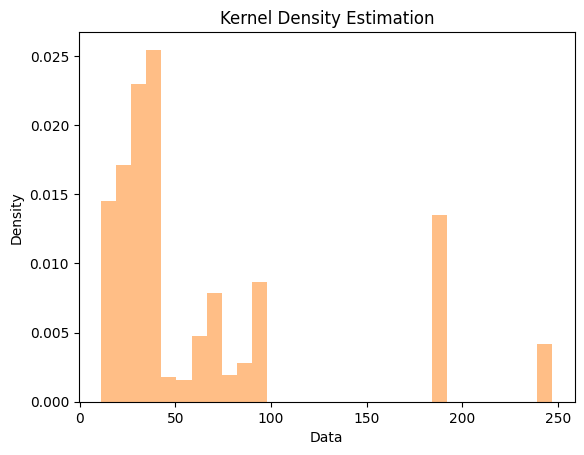

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Assuming you have a pandas DataFrame df with columns 'data_point' and 'weights'
mode = 'SOV'
cluster = 0
sample_rate = 0.3
data_in = data[(data['main_mode']==mode) & (data['Cluster']==cluster)]
data_ex = data[(data['main_mode']==mode) & (data['Cluster']!=cluster)].sample(frac=sample_rate)
data = pd.concat([data_in, data_ex], axis=0)

# Repeat each data point according to its weight
pdf_list = []
for col_name in []:
  repeated_data = np.repeat(data[col_name], (data['weight_x'].values+1).astype(int)).dropna()
  bandwidth = 0.9 * np.std(repeated_data) * len(repeated_data) ** (-1 / 5)

  # Fitting the kernel density estimator
  kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
  kde.fit(repeated_data[:, None])

  # Estimating the PDF
  x = np.array([80])
  log_pdf = kde.score_samples(x.reshape(-1, 1))
  pdf_list.append(np.exp(log_pdf))

# Plotting the PDF
#plt.plot(x, pdf)
#plt.hist(repeated_data, bins=30, density=True, alpha=0.5)
#plt.xlabel('Data')
#plt.ylabel('Density')
#plt.title('Kernel Density Estimation')
#plt.show()

In [ ]:
pdf

array([0.0009966])